<a href="https://colab.research.google.com/github/comHack/Mammography_DL_Classification/blob/master/SecondNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [2]:
import numpy as np

import pandas as pd

import cv2 as cv

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import random

import pickle

import shutil

import os

from google.colab import drive

# **Mounting Drive**

In [3]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


# **Data**


### **Setup the data**

In [3]:
# data folder link to the images_resized_2 folder in your drive
data_folder = '/gdrive/My Drive/Breast Cancer Detection/images_resized_2'

# classes
classes = ['benign', 'malign']

In [4]:
print(os.listdir(os.path.join(data_folder, classes[0])))

['aug_989.png', 'aug_990.png', 'aug_991.png', 'aug_992.png', 'aug_993.png', 'aug_994.png', 'aug_995.png', 'aug_996.png', 'aug_997.png', 'aug_998.png', 'aug_999.png', 'aug_1000.png', 'aug_1001.png', 'aug_1002.png', 'aug_1003.png', 'aug_1004.png', 'aug_1005.png', 'aug_1006.png', 'aug_1007.png', 'aug_1008.png', 'aug_1009.png', 'aug_1010.png', 'aug_1011.png', 'aug_1012.png', 'aug_1013.png', 'aug_1014.png', 'aug_1015.png', 'aug_1016.png', 'aug_1017.png', 'aug_1018.png', 'aug_1019.png', 'aug_1020.png', 'aug_1021.png', 'aug_1022.png', 'aug_1023.png', 'aug_1024.png', 'aug_1025.png', 'aug_1026.png', 'aug_1027.png', 'aug_1028.png', 'aug_1029.png', 'aug_1030.png', 'aug_1031.png', 'aug_1032.png', 'aug_1033.png', 'aug_1034.png', 'aug_1035.png', 'aug_1036.png', 'aug_1037.png', 'aug_1038.png', 'aug_1039.png', 'aug_1040.png', 'aug_1041.png', 'aug_1042.png', 'aug_1043.png', 'aug_1044.png', 'aug_1045.png', 'aug_1046.png', 'aug_1047.png', 'aug_1048.png', 'aug_1049.png', 'aug_1050.png', 'aug_1051.png', 'a

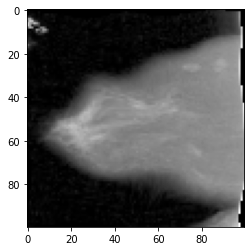

In [7]:
num_image = 251
classe = 0
path = os.path.join(data_folder, classes[classe])
images = os.listdir(path)
image = os.path.join(path, images[num_image])
image_arr = cv.imread(image, cv.IMREAD_GRAYSCALE)
new_arr = image_arr / 255
plt.imshow(image_arr, cmap='gray')
plt.show()

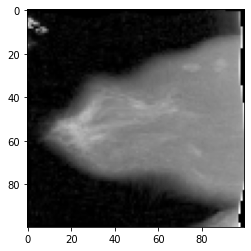

In [8]:
plt.imshow(new_arr, cmap='gray')
plt.show()

In [ ]:
print(image_arr.shape)

(100, 100)


In [ ]:
def create_data():
  '''
    create the data as grayscale images (1 channel (cv.IMREAD_GRAYSCALE))
    
    returns a list of pairs containing the image matrix and it's label
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
      data.append([image_arr, classe_num])
    
  return data

In [ ]:
def create_data_3():
  '''
    create the data as rgb images (3 channels)

    returns a list of pairs containing the image matrix and it's label 
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image))
      data.append([image_arr, classe_num])
    
  return data

In [ ]:
# creating the data (grayscale images)
data = create_data()

In [ ]:
# creating the data (rgb images)
data_3 = create_data_3()

In [ ]:
A = data.copy()

In [ ]:
A_3 = data_3.copy()

In [ ]:
print(A_3[2])
print(len(A_3))

In [ ]:
# seperating the benign and the malign (grayscale images)
benign_data = A[:1988].copy()
malign_data = A[1988:].copy()

In [ ]:
# seperating the benign and the malign (rgb images)
benign_data_3 = A_3[:1988].copy()
malign_data_3 = A_3[1988:].copy()

In [ ]:
print(benign_data[1987][1])

In [ ]:
print(len(data))

3988


In [ ]:
print(len(benign_data))

1988


In [ ]:
print(len(malign_data))

2000


In [ ]:
#random.shuffle(data)

In [ ]:
# for x in data[:10]:
#   print(x[1])

In [ ]:
# saving the arrays as pickle files for later usage (grayscale images)
pickle_out = open("benign.pickle", "wb")
pickle.dump(benign_data, pickle_out)
pickle_out.close()

pickle_out = open("malign.pickle", "wb")
pickle.dump(malign_data, pickle_out)
pickle_out.close()

In [ ]:
# saving the arrays as pickle files for later usage (rgb images)
pickle_out = open("benign_3.pickle", "wb")
pickle.dump(benign_data_3, pickle_out)
pickle_out.close()

pickle_out = open("malign_3.pickle", "wb")
pickle.dump(malign_data_3, pickle_out)
pickle_out.close()

### **Import data**

#### **GRAYSCALE IMAGES**

In [4]:
# setting the path to the pickle files saved  (grayscale images)
benign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/benign.pickle"

malign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/malign.pickle"

In [5]:
# opening pickle files (grayscale images)
pickle_in = open(benign_link, "rb")
benign_data = pickle.load(pickle_in)

pickle_in = open(malign_link, "rb")
malign_data = pickle.load(pickle_in)

In [6]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [7]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [8]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [9]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [10]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [11]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [12]:
print(X_train.shape)
print(X_test.shape)

(2791, 100, 100, 1)
(1197, 100, 100, 1)


**Scaling**

In [13]:
X_train = X_train / 255
X_test = X_test / 255

#### **RGB IMAGES**

In [14]:
# setting the path to the pickle files saved (rgb images)
benign_link_3 = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/benign_3.pickle"

malign_link_3 = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/malign_3.pickle"

In [15]:
# opening saved data pickle files (rgb images)
pickle_in = open(benign_link_3, "rb")
benign_data_3 = pickle.load(pickle_in)

pickle_in = open(malign_link_3, "rb")
malign_data_3 = pickle.load(pickle_in)

In [16]:
# shuffle the data
random.shuffle(benign_data_3)
random.shuffle(malign_data_3)

In [17]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b_3 = int(len(benign_data_3) * train_per)

trn_m_3 = int(len(malign_data_3) * train_per)

train_data_3 = benign_data_3[: trn_b_3].copy() + malign_data_3[: trn_m_3].copy()

test_data_3 = benign_data_3[trn_b_3 :].copy() + malign_data_3[trn_m_3 :].copy()

In [18]:
# shuffle train and test data
random.shuffle(train_data_3)
random.shuffle(test_data_3)

In [19]:
assert len(train_data_3 + test_data_3) == len(benign_data_3 + malign_data_3)

In [20]:
# separating the features and labels

X_train_3 = []
y_train_3 = []

X_test_3 = []
y_test_3 = []

for X, y in train_data_3:
  X_train_3.append(X)
  y_train_3.append(y)

for X, y in test_data_3:
  X_test_3.append(X)
  y_test_3.append(y)


In [21]:
# reshaping 

num_channels = 3 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train_3[0])

X_train_3 = np.array(X_train_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train_3 = np.array(y_train_3).reshape(-1)

IMG_SIZE = len(X_test_3[0])

X_test_3 = np.array(X_test_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test_3 = np.array(y_test_3).reshape(-1)

In [22]:
print(X_train_3.shape)
print(X_test_3.shape)

(2791, 100, 100, 3)
(1197, 100, 100, 3)


**Scaling**

In [23]:
X_train_3 = X_train_3 / 255
X_test_3 = X_test_3 / 255

# **Setting up models**

## **Grayscale images**

In [109]:
num_channels = 1

### **model**

In [110]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dense(1, activation='sigmoid')
     
    ]
)

In [111]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dense_28 (Dense)             (None, 1)               

In [112]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [113]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6105 - acc: 0.7025 - val_loss: 0.5698 - val_acc: 0.7143
Epoch 2/15
79/79 - 1s - loss: 0.4440 - acc: 0.8025 - val_loss: 0.4876 - val_acc: 0.7929
Epoch 3/15
79/79 - 1s - loss: 0.3840 - acc: 0.8395 - val_loss: 0.5324 - val_acc: 0.7393
Epoch 4/15
79/79 - 1s - loss: 0.3372 - acc: 0.8519 - val_loss: 0.4573 - val_acc: 0.8071
Epoch 5/15
79/79 - 1s - loss: 0.3122 - acc: 0.8638 - val_loss: 0.4082 - val_acc: 0.8321
Epoch 6/15
79/79 - 1s - loss: 0.2743 - acc: 0.8789 - val_loss: 0.4478 - val_acc: 0.8250
Epoch 7/15
79/79 - 1s - loss: 0.2440 - acc: 0.8988 - val_loss: 0.4532 - val_acc: 0.8179
Epoch 8/15
79/79 - 1s - loss: 0.2370 - acc: 0.8961 - val_loss: 0.4580 - val_acc: 0.8393
Epoch 9/15
79/79 - 1s - loss: 0.2195 - acc: 0.9028 - val_loss: 0.4046 - val_acc: 0.8393
Epoch 10/15
79/79 - 1s - loss: 0.1861 - acc: 0.9188 - val_loss: 0.6576 - val_acc: 0.8321
Epoch 11/15
79/79 - 1s - loss: 0.1851 - acc: 0.9287 - val_loss: 0.4292 - val_acc: 0.8393
Epoch 12/15
79/79 - 1s - loss:

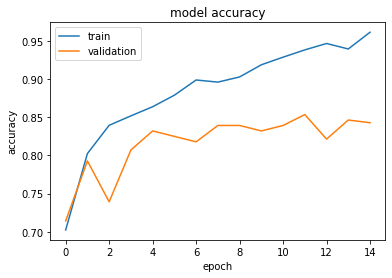

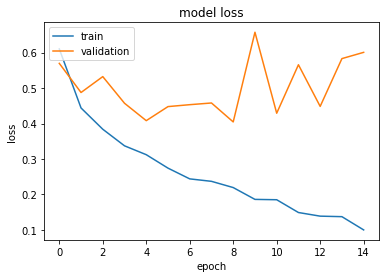

In [114]:
# Plotting the accuracy of "model"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO**

In [115]:
model_DO = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [116]:
model_DO.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)             

In [117]:
model_DO.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [118]:
result_DO = model_DO.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.5589 - acc: 0.7216 - val_loss: 0.5174 - val_acc: 0.7750
Epoch 2/15
79/79 - 1s - loss: 0.4127 - acc: 0.8232 - val_loss: 0.4378 - val_acc: 0.8107
Epoch 3/15
79/79 - 1s - loss: 0.3713 - acc: 0.8451 - val_loss: 0.4191 - val_acc: 0.8250
Epoch 4/15
79/79 - 1s - loss: 0.3460 - acc: 0.8471 - val_loss: 0.3778 - val_acc: 0.8429
Epoch 5/15
79/79 - 1s - loss: 0.3111 - acc: 0.8702 - val_loss: 0.3790 - val_acc: 0.8393
Epoch 6/15
79/79 - 1s - loss: 0.2976 - acc: 0.8734 - val_loss: 0.3473 - val_acc: 0.8571
Epoch 7/15
79/79 - 1s - loss: 0.2668 - acc: 0.8901 - val_loss: 0.3471 - val_acc: 0.8536
Epoch 8/15
79/79 - 1s - loss: 0.2502 - acc: 0.8913 - val_loss: 0.3646 - val_acc: 0.8321
Epoch 9/15
79/79 - 1s - loss: 0.2298 - acc: 0.9004 - val_loss: 0.3419 - val_acc: 0.8750
Epoch 10/15
79/79 - 1s - loss: 0.2182 - acc: 0.9088 - val_loss: 0.3596 - val_acc: 0.8643
Epoch 11/15
79/79 - 1s - loss: 0.2054 - acc: 0.9148 - val_loss: 0.3445 - val_acc: 0.8679
Epoch 12/15
79/79 - 1s - loss:

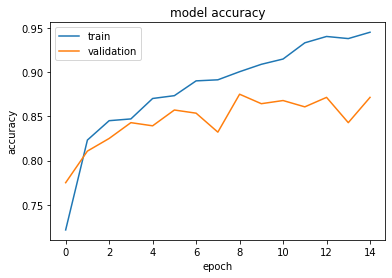

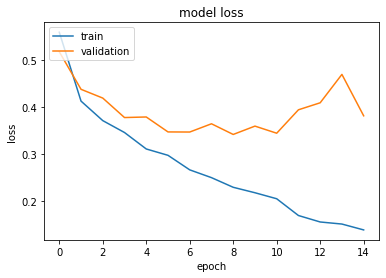

In [119]:
# Accuracy of "model_DO"
plt.plot(result_DO.history['acc'])
plt.plot(result_DO.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO"
plt.plot(result_DO.history['loss'])
plt.plot(result_DO.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_less**

In [120]:
model_DO_less = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [121]:
model_DO_less.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

In [122]:
model_DO_less.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [123]:
result_DO_less = model_DO_less.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6279 - acc: 0.6706 - val_loss: 0.5790 - val_acc: 0.7179
Epoch 2/15
79/79 - 0s - loss: 0.4914 - acc: 0.7834 - val_loss: 0.5296 - val_acc: 0.7786
Epoch 3/15
79/79 - 0s - loss: 0.4254 - acc: 0.8220 - val_loss: 0.4553 - val_acc: 0.7964
Epoch 4/15
79/79 - 0s - loss: 0.3892 - acc: 0.8403 - val_loss: 0.4089 - val_acc: 0.8036
Epoch 5/15
79/79 - 0s - loss: 0.3691 - acc: 0.8491 - val_loss: 0.4280 - val_acc: 0.8214
Epoch 6/15
79/79 - 0s - loss: 0.3507 - acc: 0.8459 - val_loss: 0.4022 - val_acc: 0.8250
Epoch 7/15
79/79 - 0s - loss: 0.3373 - acc: 0.8586 - val_loss: 0.3942 - val_acc: 0.8429
Epoch 8/15
79/79 - 0s - loss: 0.3301 - acc: 0.8674 - val_loss: 0.3830 - val_acc: 0.8393
Epoch 9/15
79/79 - 0s - loss: 0.3181 - acc: 0.8646 - val_loss: 0.3613 - val_acc: 0.8500
Epoch 10/15
79/79 - 0s - loss: 0.3079 - acc: 0.8626 - val_loss: 0.3541 - val_acc: 0.8321
Epoch 11/15
79/79 - 0s - loss: 0.3040 - acc: 0.8702 - val_loss: 0.3554 - val_acc: 0.8679
Epoch 12/15
79/79 - 0s - loss:

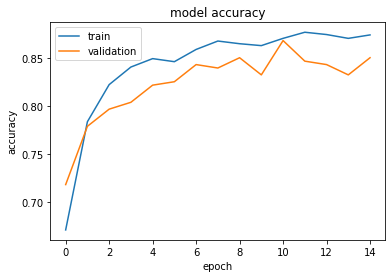

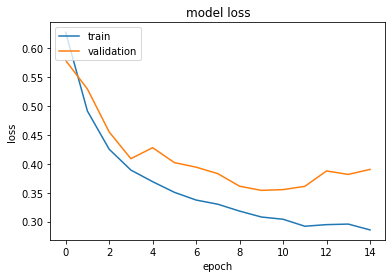

In [124]:
# Accuracy of "model_DO_less"
plt.plot(result_DO_less.history['acc'])
plt.plot(result_DO_less.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_less"
plt.plot(result_DO_less.history['loss'])
plt.plot(result_DO_less.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_06_Dense_128**

In [125]:
model_DO_06_Dense_128 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.6),

     Dense(1, activation='sigmoid')
     
    ]
)

In [126]:
model_DO_06_Dense_128.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [127]:
model_DO_06_Dense_128.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [128]:
result_DO_06_Dense_128 = model_DO_06_Dense_128.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6092 - acc: 0.6882 - val_loss: 0.5948 - val_acc: 0.7143
Epoch 2/15
79/79 - 0s - loss: 0.5151 - acc: 0.7686 - val_loss: 0.5650 - val_acc: 0.7821
Epoch 3/15
79/79 - 0s - loss: 0.4670 - acc: 0.8009 - val_loss: 0.5185 - val_acc: 0.7643
Epoch 4/15
79/79 - 0s - loss: 0.4301 - acc: 0.8192 - val_loss: 0.4934 - val_acc: 0.7857
Epoch 5/15
79/79 - 0s - loss: 0.4145 - acc: 0.8236 - val_loss: 0.4778 - val_acc: 0.7750
Epoch 6/15
79/79 - 0s - loss: 0.3915 - acc: 0.8303 - val_loss: 0.4602 - val_acc: 0.7929
Epoch 7/15
79/79 - 0s - loss: 0.3724 - acc: 0.8311 - val_loss: 0.4736 - val_acc: 0.7964
Epoch 8/15
79/79 - 0s - loss: 0.3620 - acc: 0.8391 - val_loss: 0.4304 - val_acc: 0.7857
Epoch 9/15
79/79 - 0s - loss: 0.3350 - acc: 0.8499 - val_loss: 0.4480 - val_acc: 0.7893
Epoch 10/15
79/79 - 0s - loss: 0.3270 - acc: 0.8578 - val_loss: 0.4562 - val_acc: 0.8071
Epoch 11/15
79/79 - 0s - loss: 0.3168 - acc: 0.8610 - val_loss: 0.4028 - val_acc: 0.8286
Epoch 12/15
79/79 - 0s - loss:

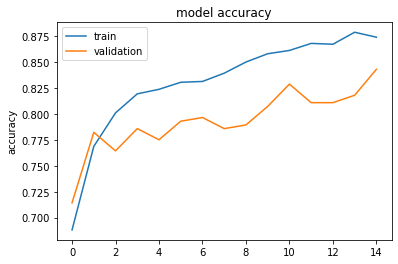

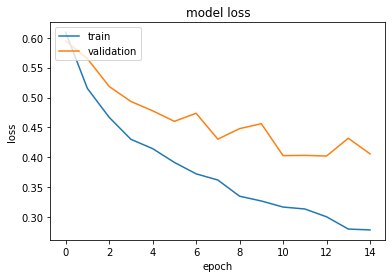

In [129]:
# Accuracy of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['acc'])
plt.plot(result_DO_06_Dense_128.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.xlabel('epoch')

# Loss of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['loss'])
plt.plot(result_DO_06_Dense_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_04_Dense_256**

In [130]:
model_DO_04_Dense_256 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(256, activation='relu'),

     Dropout(0.4),

     Dense(1, activation='sigmoid')
     
    ]
)

In [131]:
model_DO_04_Dense_256.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)             

In [132]:
model_DO_04_Dense_256.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [133]:
result_DO_04_Dense_256 = model_DO_04_Dense_256.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.5679 - acc: 0.7196 - val_loss: 0.5368 - val_acc: 0.7607
Epoch 2/15
79/79 - 0s - loss: 0.4446 - acc: 0.8104 - val_loss: 0.4685 - val_acc: 0.8000
Epoch 3/15
79/79 - 0s - loss: 0.3986 - acc: 0.8331 - val_loss: 0.4497 - val_acc: 0.8071
Epoch 4/15
79/79 - 0s - loss: 0.3725 - acc: 0.8375 - val_loss: 0.4457 - val_acc: 0.8000
Epoch 5/15
79/79 - 0s - loss: 0.3434 - acc: 0.8515 - val_loss: 0.4202 - val_acc: 0.8107
Epoch 6/15
79/79 - 0s - loss: 0.3383 - acc: 0.8554 - val_loss: 0.3962 - val_acc: 0.8214
Epoch 7/15
79/79 - 0s - loss: 0.3229 - acc: 0.8610 - val_loss: 0.3975 - val_acc: 0.8286
Epoch 8/15
79/79 - 0s - loss: 0.2906 - acc: 0.8757 - val_loss: 0.3528 - val_acc: 0.8536
Epoch 9/15
79/79 - 0s - loss: 0.2692 - acc: 0.8857 - val_loss: 0.3825 - val_acc: 0.8464
Epoch 10/15
79/79 - 0s - loss: 0.2741 - acc: 0.8829 - val_loss: 0.3693 - val_acc: 0.8500
Epoch 11/15
79/79 - 0s - loss: 0.2518 - acc: 0.8945 - val_loss: 0.3835 - val_acc: 0.8321
Epoch 12/15
79/79 - 0s - loss:

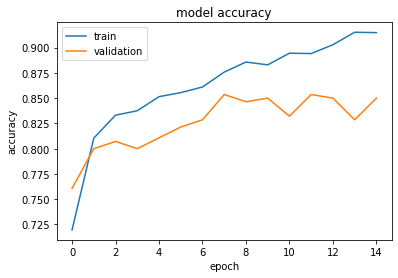

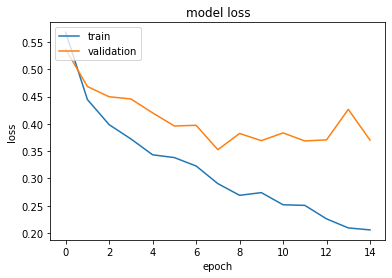

In [134]:
# Accuracy of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['acc'])
plt.plot(result_DO_04_Dense_256.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['loss'])
plt.plot(result_DO_04_Dense_256.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **RGB images**

In [50]:
num_channels = 3

### **model**

In [51]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dense(1, activation='sigmoid')
     
    ]
)

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [53]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [54]:
result = model.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.5868 - acc: 0.7236 - val_loss: 0.4244 - val_acc: 0.8179
Epoch 2/15
79/79 - 1s - loss: 0.4266 - acc: 0.8100 - val_loss: 0.4171 - val_acc: 0.8071
Epoch 3/15
79/79 - 1s - loss: 0.3847 - acc: 0.8343 - val_loss: 0.3109 - val_acc: 0.8679
Epoch 4/15
79/79 - 1s - loss: 0.3339 - acc: 0.8479 - val_loss: 0.3452 - val_acc: 0.8750
Epoch 5/15
79/79 - 1s - loss: 0.3054 - acc: 0.8706 - val_loss: 0.3297 - val_acc: 0.8607
Epoch 6/15
79/79 - 1s - loss: 0.2837 - acc: 0.8750 - val_loss: 0.3199 - val_acc: 0.8643
Epoch 7/15
79/79 - 1s - loss: 0.2364 - acc: 0.9012 - val_loss: 0.3448 - val_acc: 0.8571
Epoch 8/15
79/79 - 1s - loss: 0.2166 - acc: 0.9032 - val_loss: 0.2870 - val_acc: 0.8964
Epoch 9/15
79/79 - 1s - loss: 0.2068 - acc: 0.9148 - val_loss: 0.3571 - val_acc: 0.8536
Epoch 10/15
79/79 - 1s - loss: 0.1705 - acc: 0.9259 - val_loss: 0.3016 - val_acc: 0.8679
Epoch 11/15
79/79 - 1s - loss: 0.1538 - acc: 0.9347 - val_loss: 0.3160 - val_acc: 0.8821
Epoch 12/15
79/79 - 1s - loss:

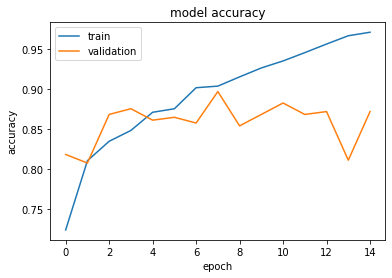

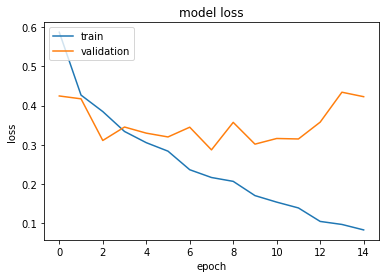

In [55]:
# Plotting the accuracy of "model"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO**

In [56]:
model_DO = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [57]:
model_DO.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

In [58]:
model_DO.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [59]:
result_DO = model_DO.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6601 - acc: 0.6834 - val_loss: 0.4980 - val_acc: 0.7964
Epoch 2/15
79/79 - 1s - loss: 0.4758 - acc: 0.7917 - val_loss: 0.4244 - val_acc: 0.8321
Epoch 3/15
79/79 - 1s - loss: 0.4172 - acc: 0.8188 - val_loss: 0.3520 - val_acc: 0.8321
Epoch 4/15
79/79 - 1s - loss: 0.3819 - acc: 0.8343 - val_loss: 0.3248 - val_acc: 0.8786
Epoch 5/15
79/79 - 1s - loss: 0.3580 - acc: 0.8455 - val_loss: 0.3011 - val_acc: 0.8857
Epoch 6/15
79/79 - 1s - loss: 0.3369 - acc: 0.8558 - val_loss: 0.2944 - val_acc: 0.8857
Epoch 7/15
79/79 - 1s - loss: 0.3195 - acc: 0.8610 - val_loss: 0.2772 - val_acc: 0.8893
Epoch 8/15
79/79 - 1s - loss: 0.2940 - acc: 0.8726 - val_loss: 0.2843 - val_acc: 0.8821
Epoch 9/15
79/79 - 1s - loss: 0.2846 - acc: 0.8781 - val_loss: 0.3083 - val_acc: 0.8714
Epoch 10/15
79/79 - 1s - loss: 0.2655 - acc: 0.8817 - val_loss: 0.2848 - val_acc: 0.8964
Epoch 11/15
79/79 - 1s - loss: 0.2428 - acc: 0.8901 - val_loss: 0.2887 - val_acc: 0.8821
Epoch 12/15
79/79 - 1s - loss:

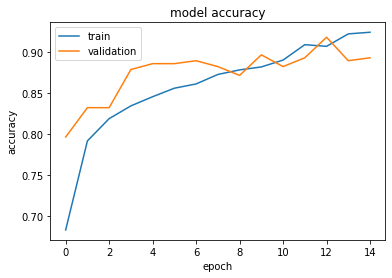

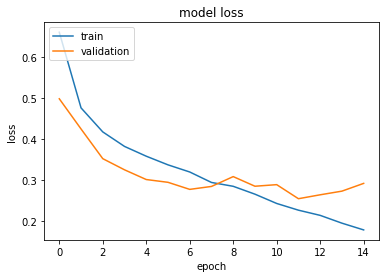

In [60]:
# Accuracy of "model_DO"
plt.plot(result_DO.history['acc'])
plt.plot(result_DO.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO"
plt.plot(result_DO.history['loss'])
plt.plot(result_DO.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_less**

In [61]:
model_DO_less = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [62]:
model_DO_less.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [63]:
model_DO_less.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [64]:
result_DO_less = model_DO_less.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6910 - acc: 0.6065 - val_loss: 0.5723 - val_acc: 0.7464
Epoch 2/15
79/79 - 0s - loss: 0.5734 - acc: 0.7288 - val_loss: 0.5090 - val_acc: 0.7821
Epoch 3/15
79/79 - 0s - loss: 0.5090 - acc: 0.7583 - val_loss: 0.4460 - val_acc: 0.8250
Epoch 4/15
79/79 - 0s - loss: 0.4681 - acc: 0.7997 - val_loss: 0.4321 - val_acc: 0.8286
Epoch 5/15
79/79 - 0s - loss: 0.4368 - acc: 0.8061 - val_loss: 0.4288 - val_acc: 0.8071
Epoch 6/15
79/79 - 0s - loss: 0.4093 - acc: 0.8172 - val_loss: 0.3566 - val_acc: 0.8643
Epoch 7/15
79/79 - 0s - loss: 0.3902 - acc: 0.8395 - val_loss: 0.3344 - val_acc: 0.8643
Epoch 8/15
79/79 - 0s - loss: 0.3658 - acc: 0.8471 - val_loss: 0.3316 - val_acc: 0.8607
Epoch 9/15
79/79 - 0s - loss: 0.3569 - acc: 0.8463 - val_loss: 0.3251 - val_acc: 0.8857
Epoch 10/15
79/79 - 0s - loss: 0.3531 - acc: 0.8487 - val_loss: 0.3090 - val_acc: 0.8714
Epoch 11/15
79/79 - 0s - loss: 0.3337 - acc: 0.8479 - val_loss: 0.3065 - val_acc: 0.8786
Epoch 12/15
79/79 - 0s - loss:

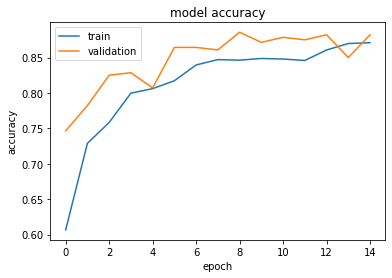

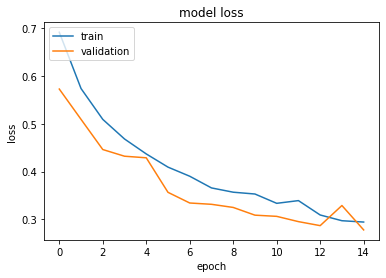

In [65]:
# Accuracy of "model_DO_less"
plt.plot(result_DO_less.history['acc'])
plt.plot(result_DO_less.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_less"
plt.plot(result_DO_less.history['loss'])
plt.plot(result_DO_less.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_06_Dense_128**

In [66]:
model_DO_06_Dense_128 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.6),

     Dense(1, activation='sigmoid')
     
    ]
)

In [67]:
model_DO_06_Dense_128.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [68]:
model_DO_06_Dense_128.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [69]:
result_DO_06_Dense_128 = model_DO_06_Dense_128.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6771 - acc: 0.6221 - val_loss: 0.5743 - val_acc: 0.7071
Epoch 2/15
79/79 - 0s - loss: 0.5551 - acc: 0.7336 - val_loss: 0.5012 - val_acc: 0.7714
Epoch 3/15
79/79 - 0s - loss: 0.4991 - acc: 0.7786 - val_loss: 0.4327 - val_acc: 0.8071
Epoch 4/15
79/79 - 0s - loss: 0.4540 - acc: 0.8037 - val_loss: 0.3886 - val_acc: 0.8429
Epoch 5/15
79/79 - 0s - loss: 0.4300 - acc: 0.8100 - val_loss: 0.3840 - val_acc: 0.8429
Epoch 6/15
79/79 - 0s - loss: 0.3911 - acc: 0.8264 - val_loss: 0.3376 - val_acc: 0.8714
Epoch 7/15
79/79 - 0s - loss: 0.3842 - acc: 0.8347 - val_loss: 0.3284 - val_acc: 0.8714
Epoch 8/15
79/79 - 0s - loss: 0.3478 - acc: 0.8411 - val_loss: 0.3126 - val_acc: 0.8643
Epoch 9/15
79/79 - 0s - loss: 0.3499 - acc: 0.8483 - val_loss: 0.3103 - val_acc: 0.8714
Epoch 10/15
79/79 - 0s - loss: 0.3291 - acc: 0.8598 - val_loss: 0.2875 - val_acc: 0.8786
Epoch 11/15
79/79 - 0s - loss: 0.3380 - acc: 0.8530 - val_loss: 0.3097 - val_acc: 0.8893
Epoch 12/15
79/79 - 0s - loss:

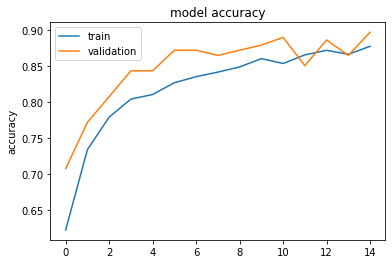

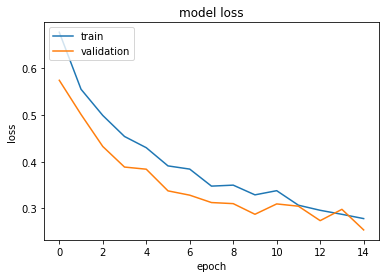

In [70]:
# Accuracy of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['acc'])
plt.plot(result_DO_06_Dense_128.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.xlabel('epoch')

# Loss of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['loss'])
plt.plot(result_DO_06_Dense_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_04_Dense_256**

In [71]:
model_DO_04_Dense_256 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(256, activation='relu'),

     Dropout(0.4),

     Dense(1, activation='sigmoid')
     
    ]
)

In [72]:
model_DO_04_Dense_256.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [73]:
model_DO_04_Dense_256.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [74]:
result_DO_04_Dense_256 = model_DO_04_Dense_256.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6111 - acc: 0.6858 - val_loss: 0.4937 - val_acc: 0.8107
Epoch 2/15
79/79 - 0s - loss: 0.4745 - acc: 0.7925 - val_loss: 0.4336 - val_acc: 0.8179
Epoch 3/15
79/79 - 0s - loss: 0.4273 - acc: 0.8128 - val_loss: 0.3714 - val_acc: 0.8393
Epoch 4/15
79/79 - 0s - loss: 0.3919 - acc: 0.8264 - val_loss: 0.3394 - val_acc: 0.8500
Epoch 5/15
79/79 - 1s - loss: 0.3594 - acc: 0.8371 - val_loss: 0.3719 - val_acc: 0.8571
Epoch 6/15
79/79 - 0s - loss: 0.3353 - acc: 0.8487 - val_loss: 0.3455 - val_acc: 0.8679
Epoch 7/15
79/79 - 0s - loss: 0.3272 - acc: 0.8526 - val_loss: 0.3227 - val_acc: 0.8607
Epoch 8/15
79/79 - 0s - loss: 0.2957 - acc: 0.8630 - val_loss: 0.3419 - val_acc: 0.8429
Epoch 9/15
79/79 - 0s - loss: 0.3008 - acc: 0.8650 - val_loss: 0.3154 - val_acc: 0.8714
Epoch 10/15
79/79 - 0s - loss: 0.2608 - acc: 0.8921 - val_loss: 0.2981 - val_acc: 0.8893
Epoch 11/15
79/79 - 0s - loss: 0.2532 - acc: 0.8984 - val_loss: 0.3214 - val_acc: 0.8714
Epoch 12/15
79/79 - 0s - loss:

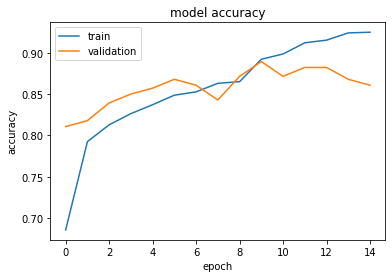

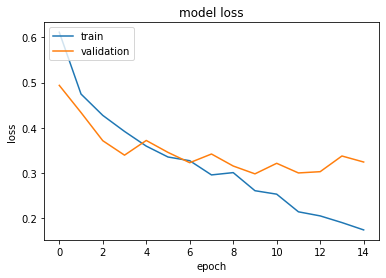

In [75]:
# Accuracy of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['acc'])
plt.plot(result_DO_04_Dense_256.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['loss'])
plt.plot(result_DO_04_Dense_256.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **model_vgg**

#### **vgg without dropout**

In [76]:
vgg = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [77]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [78]:
last_layer = vgg.get_layer('block4_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 512)


In [79]:
x = Flatten()(last_output)

x = Dense(256, activation='relu')(x)
#x = Dense(256, activation='relu')(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg = Model(vgg.input, outputs=x)


In [80]:
model_vgg.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [81]:
model_vgg.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [82]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [83]:
result_model_vgg = model_vgg.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 3s - loss: 1.6266 - acc: 0.7264 - val_loss: 0.3836 - val_acc: 0.8429
Epoch 2/15
79/79 - 2s - loss: 0.3263 - acc: 0.8602 - val_loss: 0.4276 - val_acc: 0.8107
Epoch 3/15
79/79 - 2s - loss: 0.2521 - acc: 0.8957 - val_loss: 0.2915 - val_acc: 0.8964
Epoch 4/15
79/79 - 2s - loss: 0.1756 - acc: 0.9371 - val_loss: 0.3232 - val_acc: 0.8607
Epoch 5/15
79/79 - 2s - loss: 0.1186 - acc: 0.9654 - val_loss: 0.2433 - val_acc: 0.9071
Epoch 6/15
79/79 - 3s - loss: 0.0881 - acc: 0.9781 - val_loss: 0.2183 - val_acc: 0.9214
Epoch 7/15
79/79 - 3s - loss: 0.0603 - acc: 0.9908 - val_loss: 0.2397 - val_acc: 0.9286
Epoch 8/15
79/79 - 3s - loss: 0.0527 - acc: 0.9892 - val_loss: 0.2049 - val_acc: 0.9250
Epoch 9/15
79/79 - 3s - loss: 0.0394 - acc: 0.9928 - val_loss: 0.2096 - val_acc: 0.9214
Epoch 10/15
79/79 - 3s - loss: 0.0292 - acc: 0.9968 - val_loss: 0.2265 - val_acc: 0.9321
Epoch 11/15
79/79 - 3s - loss: 0.0171 - acc: 0.9996 - val_loss: 0.2334 - val_acc: 0.9143
Epoch 12/15
79/79 - 3s - loss:

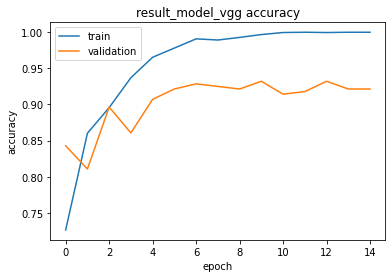

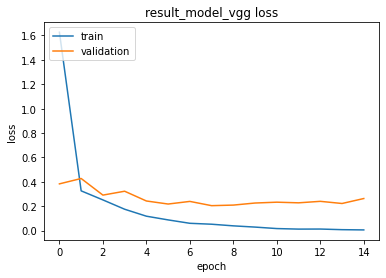

In [84]:
# Accuracy of "result_model_vgg"
plt.plot(result_model_vgg.history['acc'])
plt.plot(result_model_vgg.history['val_acc'])
plt.title('result_model_vgg accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg"
plt.plot(result_model_vgg.history['loss'])
plt.plot(result_model_vgg.history['val_loss'])
plt.title('result_model_vgg loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### **vgg with dropout**

In [85]:
vgg_do = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg_do.layers:
  layer.trainable = False

In [86]:
vgg_do.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [87]:
last_layer = vgg_do.get_layer('block4_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 512)


In [88]:
x = Flatten()(last_output)

x = Dense(256, activation='relu')(x)
#x = Dense(256, activation='relu')(x)

x = Dropout(0.3)(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg_do = Model(vgg_do.input, outputs=x)

In [89]:
model_vgg_do.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [90]:
model_vgg_do.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [91]:
"""
result_model_vgg_do = model_vgg_do.fit(
    train_generator,
    steps_per_epoch = 160,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 20,
    verbose = 2
)
"""

result_model_vgg_do = model_vgg_do.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)


Epoch 1/15
79/79 - 3s - loss: 1.8515 - acc: 0.6587 - val_loss: 0.4686 - val_acc: 0.8214
Epoch 2/15
79/79 - 2s - loss: 0.4697 - acc: 0.7814 - val_loss: 0.3796 - val_acc: 0.8500
Epoch 3/15
79/79 - 2s - loss: 0.3724 - acc: 0.8339 - val_loss: 0.3283 - val_acc: 0.8714
Epoch 4/15
79/79 - 2s - loss: 0.3170 - acc: 0.8718 - val_loss: 0.3462 - val_acc: 0.8571
Epoch 5/15
79/79 - 2s - loss: 0.2834 - acc: 0.8746 - val_loss: 0.3521 - val_acc: 0.8464
Epoch 6/15
79/79 - 2s - loss: 0.2413 - acc: 0.9036 - val_loss: 0.2943 - val_acc: 0.8750
Epoch 7/15
79/79 - 2s - loss: 0.1953 - acc: 0.9227 - val_loss: 0.2478 - val_acc: 0.8964
Epoch 8/15
79/79 - 2s - loss: 0.1940 - acc: 0.9156 - val_loss: 0.2507 - val_acc: 0.9179
Epoch 9/15
79/79 - 2s - loss: 0.1502 - acc: 0.9387 - val_loss: 0.3338 - val_acc: 0.8643
Epoch 10/15
79/79 - 2s - loss: 0.1714 - acc: 0.9243 - val_loss: 0.2773 - val_acc: 0.8893
Epoch 11/15
79/79 - 2s - loss: 0.1211 - acc: 0.9542 - val_loss: 0.3034 - val_acc: 0.8750
Epoch 12/15
79/79 - 2s - loss:

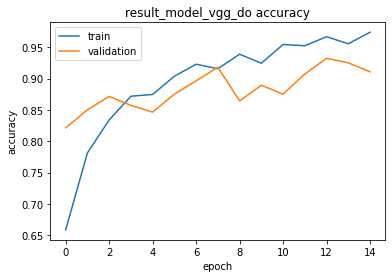

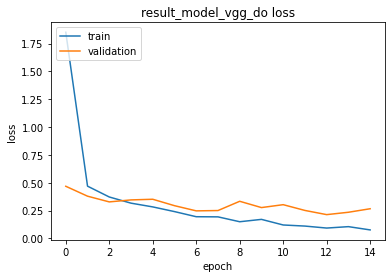

In [92]:
# Accuracy of "result_model_vgg_do"
plt.plot(result_model_vgg_do.history['acc'])
plt.plot(result_model_vgg_do.history['val_acc'])
plt.title('result_model_vgg_do accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg_do"
plt.plot(result_model_vgg_do.history['loss'])
plt.plot(result_model_vgg_do.history['val_loss'])
plt.title('result_model_vgg_do loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [93]:
vgg_do_block5 = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg_do_block5.layers:
  layer.trainable = False

In [94]:
vgg_do_block5.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [95]:
last_layer = vgg_do_block5.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 512)


In [96]:
x = Flatten()(last_output)

x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg_do_block5 = Model(vgg_do_block5.input, outputs=x)

In [97]:
model_vgg_do_block5.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [98]:
model_vgg_do_block5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [99]:
result_model_vgg_do_block5 = model_vgg_do_block5.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 3s - loss: 0.7252 - acc: 0.5723 - val_loss: 0.6245 - val_acc: 0.6214
Epoch 2/15
79/79 - 3s - loss: 0.5546 - acc: 0.7192 - val_loss: 0.4479 - val_acc: 0.7964
Epoch 3/15
79/79 - 3s - loss: 0.4957 - acc: 0.7614 - val_loss: 0.4628 - val_acc: 0.8036
Epoch 4/15
79/79 - 3s - loss: 0.4552 - acc: 0.7838 - val_loss: 0.4015 - val_acc: 0.8500
Epoch 5/15
79/79 - 3s - loss: 0.4330 - acc: 0.8013 - val_loss: 0.4281 - val_acc: 0.7929
Epoch 6/15
79/79 - 3s - loss: 0.4134 - acc: 0.8132 - val_loss: 0.3839 - val_acc: 0.8607
Epoch 7/15
79/79 - 3s - loss: 0.3601 - acc: 0.8303 - val_loss: 0.3400 - val_acc: 0.8679
Epoch 8/15
79/79 - 3s - loss: 0.3744 - acc: 0.8284 - val_loss: 0.3875 - val_acc: 0.8500
Epoch 9/15
79/79 - 3s - loss: 0.3358 - acc: 0.8511 - val_loss: 0.3815 - val_acc: 0.8179
Epoch 10/15
79/79 - 3s - loss: 0.3305 - acc: 0.8499 - val_loss: 0.3480 - val_acc: 0.8750
Epoch 11/15
79/79 - 3s - loss: 0.3133 - acc: 0.8638 - val_loss: 0.3547 - val_acc: 0.8571
Epoch 12/15
79/79 - 3s - loss:

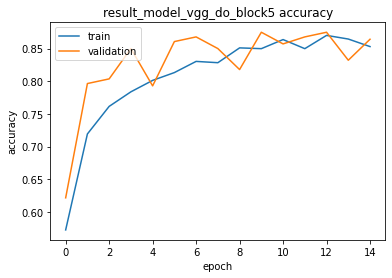

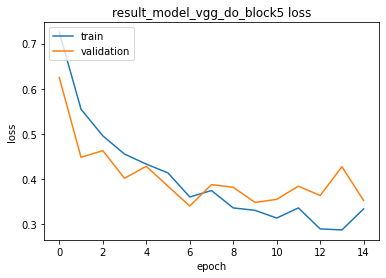

In [100]:
# Accuracy of "result_model_vgg_do_block5"
plt.plot(result_model_vgg_do_block5.history['acc'])
plt.plot(result_model_vgg_do_block5.history['val_acc'])
plt.title('result_model_vgg_do_block5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg_do_block5"
plt.plot(result_model_vgg_do_block5.history['loss'])
plt.plot(result_model_vgg_do_block5.history['val_loss'])
plt.title('result_model_vgg_do_block5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **model_resnet**

### **model_inception**

# **Evaluation of the models**

## **Grayscale images**

### **model**

In [135]:
resEv_model = model.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model)

60/60 [==============================] - 0s 3ms/step - loss: 0.5709 - acc: 0.8505
test loss, test acc: [0.5708868503570557, 0.8504594564437866]


### **model_DO**

In [136]:
resEv_model_DO = model_DO.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model_DO)

60/60 [==============================] - 0s 3ms/step - loss: 0.4142 - acc: 0.8563
test loss, test acc: [0.4141804277896881, 0.8563074469566345]


### **model_DO_04_Dense_256**

In [137]:
resEv_model_DO_04_Dense_256 = model_DO_04_Dense_256.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model_DO_04_Dense_256)

60/60 [==============================] - 0s 3ms/step - loss: 0.3874 - acc: 0.8413
test loss, test acc: [0.3874412775039673, 0.841269850730896]


### **model_DO_06_Dense_128**

In [138]:
resEv_model_DO_06_Dense_128 = model_DO_06_Dense_128.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model_DO_06_Dense_128)

60/60 [==============================] - 0s 3ms/step - loss: 0.4139 - acc: 0.8246
test loss, test acc: [0.41394299268722534, 0.8245614171028137]


### **model_DO_less**

In [139]:
resEv_model_DO_less = model_DO_less.evaluate(X_test, y_test, 20)
print('test loss, test acc:', resEv_model_DO_less)

60/60 [==============================] - 0s 2ms/step - loss: 0.3848 - acc: 0.8555
test loss, test acc: [0.3847937285900116, 0.8554720282554626]


## **RGB images**

### **model**

In [101]:
resEv_model = model.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model)

60/60 [==============================] - 0s 4ms/step - loss: 0.5733 - acc: 0.8221
test loss, test acc: [0.5733054876327515, 0.8220551609992981]


### **model_DO**

In [102]:
resEv_model_DO = model_DO.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_DO)

60/60 [==============================] - 0s 3ms/step - loss: 0.4207 - acc: 0.8580
test loss, test acc: [0.4207492768764496, 0.8579782843589783]


### **model_DO_04_Dense_256**

In [103]:
resEv_model_DO_04_Dense_256 = model_DO_04_Dense_256.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_DO_04_Dense_256)

60/60 [==============================] - 0s 3ms/step - loss: 0.3698 - acc: 0.8613
test loss, test acc: [0.36978259682655334, 0.8613199591636658]


### **model_DO_06_Dense_128**

In [104]:
resEv_model_DO_06_Dense_128 = model_DO_06_Dense_128.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_DO_06_Dense_128)

60/60 [==============================] - 0s 3ms/step - loss: 0.3304 - acc: 0.8655
test loss, test acc: [0.3303968012332916, 0.8654970526695251]


### **model_DO_less**

In [105]:
resEv_model_DO_less = model_DO_less.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_DO_less)

60/60 [==============================] - 0s 3ms/step - loss: 0.3408 - acc: 0.8713
test loss, test acc: [0.3407999277114868, 0.871345043182373]


### **model_vgg**

In [106]:
resEv_model_vgg = model_vgg.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_vgg)

60/60 [==============================] - 2s 28ms/step - loss: 0.3586 - acc: 0.8981
test loss, test acc: [0.35857024788856506, 0.8980785012245178]


In [108]:
resEv_model_vgg_do_block5 = model_vgg_do_block5.evaluate(X_test_3, y_test_3, 20)
print('test loss, test acc:', resEv_model_vgg_do_block5)

60/60 [==============================] - 2s 28ms/step - loss: 0.3984 - acc: 0.8363
test loss, test acc: [0.3983507454395294, 0.8362573385238647]
